In [1]:
from google.colab import drive
drive.mount('/gdrive', force_remount = True)

Mounted at /gdrive


In [2]:
import pandas as pd
creditcard = pd.read_csv('/gdrive/MyDrive/22-1 기계학습 실습/Data/creditcard.csv')
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
creditcard["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [4]:
X = creditcard.iloc[:, 0:30]
y = creditcard["Class"]

## Over Sampling

In [16]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
method = RandomOverSampler()
X_resampled, y_resampled = method.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

[(0, 284315), (1, 284315)]


Text(0, 0.5, 'V2')

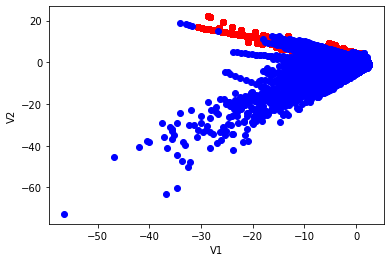

In [6]:
class_lable_1_over = X_resampled[y_resampled == 1]
class_lable_0_over = X_resampled[y_resampled == 0]

from matplotlib import pyplot as plt
plt.scatter(class_lable_1_over["V1"], class_lable_1_over["V2"], color = "red")
plt.scatter(class_lable_0_over["V1"], class_lable_0_over["V2"], color = "blue")
plt.xlabel("V1")
plt.ylabel("V2")

## Under Sampling

In [17]:
from imblearn.under_sampling import RandomUnderSampler
method = RandomUnderSampler()
X_resampled, y_resampled = method.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

[(0, 492), (1, 492)]


Text(0, 0.5, 'V2')

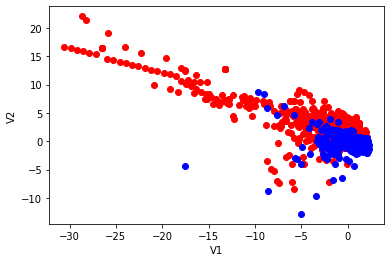

In [8]:
class_lable_1_under = X_resampled[y_resampled == 1]
class_lable_0_under = X_resampled[y_resampled == 0]

import matplotlib.pyplot as plt
plt.scatter(class_lable_1_under["V1"], class_lable_1_under["V2"], color = "red")
plt.scatter(class_lable_0_under["V1"], class_lable_0_under["V2"], color = "blue")
plt.xlabel("V1")
plt.ylabel("V2")

## Both Sampling

In [9]:
#from imblearn.combine import SMOTEENN
#method = SMOTEENN()
#X_resampled, y_resampled = method.fit_resample(X, y)
#print(sorted(Counter(y_resampled.items())))

In [10]:
#class_lable_1_both = X_resampled[y_resampled == 1]
#class_lable_0_both = X_resampled[y_resampled == 0]

#import matplotlib.pyplot as plt
#plt.scatter(class_lable_1_both["V1"], class_lable_1_both["V2"], color = "red")
#plt.scatter(class_lable_0_both["V1"], class_lable_0_both["V2"], color = "blue")
#plt.xlabel("V1")
#plt.ylabel("V2")

## SMOTE

In [18]:
from imblearn.over_sampling import SMOTE
method = SMOTE()
X_resampled, y_resampled = method.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

[(0, 284315), (1, 284315)]


Text(0, 0.5, 'V2')

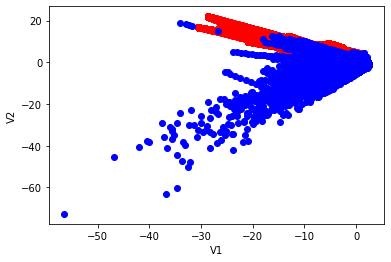

In [12]:
class_lable_1_SMOTE = X_resampled[y_resampled == 1]
class_lable_0_SMOTE = X_resampled[y_resampled == 0]

import matplotlib.pyplot as plt
plt.scatter(class_lable_1_SMOTE["V1"], class_lable_1_SMOTE["V2"], color = "red")
plt.scatter(class_lable_0_SMOTE["V1"], class_lable_0_SMOTE["V2"], color = "blue")
plt.xlabel("V1")
plt.ylabel("V2")